In [2]:
from __future__ import division
import random
import kwant
import matplotlib.pyplot as plt
import numpy as np
from common_functions import calculate, draw
from make_transport_system import monolayer_graphene

class SimplenameSpace:
    def __init__(self):
        self.EL = 0.0
        self.ER = 0.0
        self.phi = 0.0
        self.W = 0.0
        self.EF = 0.0

In [11]:
def attr_vers_cond(sys,pars,values,attr,ylim):
    Ts = [
        calculate.calculate_conductance(sys, 0.0, out_leads=1, in_leads=0, pars=pars)
        for vars(pars)[attr]  in values
        ]
    draw.simple_plot_data_2d_without_ax([values, Ts], ylim=ylim, xlabel=attr,ylabel="Conductance")
    # return np.array([values, Ts])
    
def random_map(sys):
    pars = SimplenameSpace()
    pars.EL = -0.1
    pars.ER = 0.1
    pars.phi = 0.007*2.3
    pars.EF = 0.0
    pars.W = 0.6
    wd = calculate.wave_density(sys,pars,lead_nr=0)
    T = calculate.calculate_conductance(sys,pars.EF,1,0,pars)
    return  T, wd

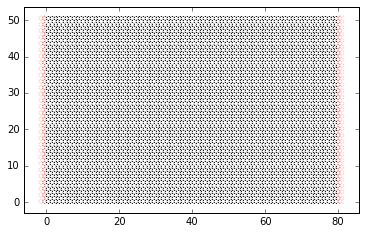

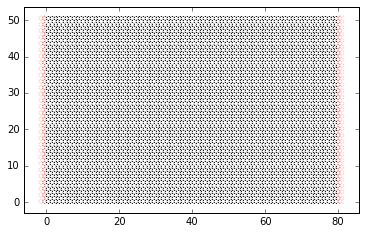

In [7]:
%matplotlib inline
Nx = 80
Ny = 30
sys, lead_left, lead_right = monolayer_graphene.make_monolayer_graphene_system(Nx,Ny)
kwant.plot(sys)

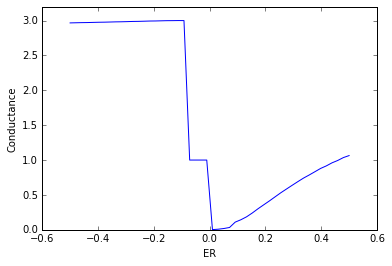

In [13]:
pars = SimplenameSpace()
pars.EL = -0.1
pars.phi = 0.0
values = np.linspace(-0.5,0.5,50)
attr_vers_cond(sys,pars,values,"ER",ylim=[0,3.2])

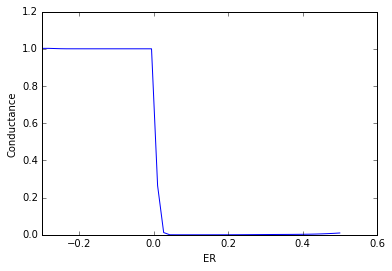

In [17]:
pars = SimplenameSpace()
pars.EL = -0.1
pars.phi = 0.007*2.3
values = np.linspace(-0.3,0.5,50)
attr_vers_cond(sys,pars,values,"ER",ylim=[0,1.2])

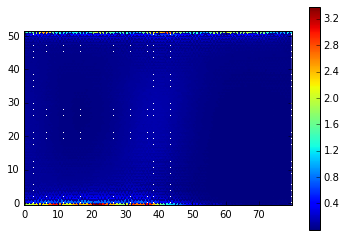

0.481516000374


In [21]:
def manytimes_random_map(N=200):
    wd0, T0 = 0, 0
    random.seed(10000)
    for i in range(N):
        T , wd = random_map(sys)
        wd0 = wd0 + wd
        # print i,T
        T0 = T0 + T
    
    kwant.plotter.map(sys, wd0/N)
    print T0/N
manytimes_random_map()

In [ ]:
manytimes_random_map(N=200)